In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [4]:
email_df=pd.read_csv('email.csv')

In [5]:
email_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
email_df['Category']=(email_df['Category']=='ham').astype(int)

In [7]:
email_df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
email_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
email_df.duplicated().sum()

415

In [10]:
email_df.drop_duplicates(inplace=True)

In [11]:
email_df.duplicated().sum()

0

In [12]:
email_df.shape

(5158, 2)

In [13]:
email_df['Category'].value_counts()

Category
1    4516
0     642
Name: count, dtype: int64

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [19]:
def clean_text(text):
    #tokenization
    tokens=word_tokenize(text)

    #Remove stopwords
    filtered_tokens=[word for word in tokens if word.lower() not in stop_words]

    #Stemming
    stemmed_tokens=[stemmer.stem(word) for word in filtered_tokens]

    #Lemmatization
    lemmatized_tokens=[lemmatizer.lemmatize(word) for word in filtered_tokens]

    cleaned_text=' '.join(lemmatized_tokens)

    return cleaned_text


In [20]:
email_df['processed_text']=email_df['Message'].apply(clean_text)

In [21]:
email_df.head()

,Category,Message,processed_text
0,1,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g..."
1,1,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,1,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...
4,1,"Nah I don't think he goes to usf, he lives aro...","Nah n't think go usf , life around though"


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
vector=CountVectorizer()
x_bow=vector.fit_transform(email_df['processed_text'])

In [24]:
email_df['x_bow']=x_bow.toarray().tolist()

In [25]:
email_df.head()

,Category,Message,processed_text,x_bow
0,1,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,"Nah I don't think he goes to usf, he lives aro...","Nah n't think go usf , life around though","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
y=email_df['Category']
X_train, X_test, y_train, y_test=train_test_split(x_bow, y, test_size=0.3, random_state=0)

In [27]:
model=MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred=model.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       211
           1       0.99      0.99      0.99      1337

    accuracy                           0.98      1548
   macro avg       0.95      0.96      0.95      1548
weighted avg       0.98      0.98      0.98      1548



In [30]:
model.score(X_test, y_test)

0.9780361757105943

In [31]:
lookup=dict(zip(email_df.Category.unique(),email_df['Category'].unique()))
lookup

{1: 1, 0: 0}

In [32]:
email_df.head()

,Category,Message,processed_text,x_bow
0,1,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,"Nah I don't think he goes to usf, he lives aro...","Nah n't think go usf , life around though","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


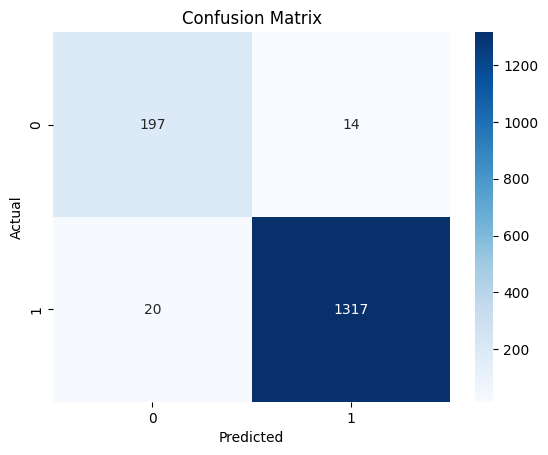

In [33]:
#Confusion Matrix
import seaborn as sns
conf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
def predict_email(text):
    cleaned_text=clean_text(text)
    vectorizer=vector.transform([cleaned_text])
    prediction=model.predict(vectorizer)
    return prediction[0]

In [39]:
new_email=input("Enter the email text:")
print(new_email)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


In [40]:
prediction=predict_email(new_email)
print(lookup[prediction])

0
